lab assignment title: Association Rule Mining with Apriori and FP-Growth 
Name:
course title: 

Overview: 

In this lab, you will explore association rule mining techniques using the Apriori and FP-Growth algorithms. You will analyze transactional data, identify frequent itemsets, and generate meaningful association rules. Additionally, you will use Seaborn to create visualizations that help interpret the mined patterns and insights. This lab will enhance your understanding of how association rule mining techniques are applied in real-world scenarios to uncover hidden patterns in data and present them effectively. 


Step 1: Data Preparation 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB
None
                  Date                   Mode        Category  \
0  20/09/2018 12:04:08                   Cash  Transportation   
1  20/09/2018 12:03:15                   Cash            Food   
2           19/09/2018  Saving Bank account 1    subscription   
3  17/09/2018 23:41:17  Saving Bank account 1    subscription   
4  16/09/2018 17:15:08                   Cash       Festival

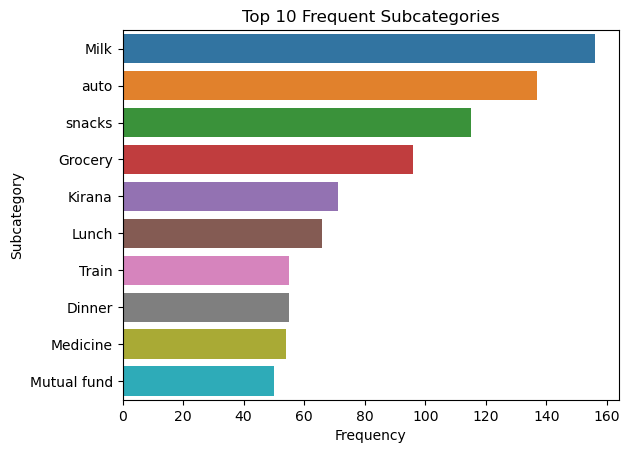

In [33]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Daily Household Transactions.csv')

# Explore data
print(df.info())
print(df.head())

# Basic cleaning (example: drop nulls, filter data)
df.dropna(inplace=True)

# Visualization: Top frequent subcategories
top_subcats = df['Subcategory'].value_counts().head(10)
sns.barplot(x=top_subcats.values, y=top_subcats.index)
plt.title('Top 10 Frequent Subcategories')
plt.xlabel('Frequency')
plt.ylabel('Subcategory')
plt.show()


Step 2: Frequent Itemset Mining Using Apriori 

     support       itemsets
17  0.132819         (Milk)
27  0.101971         (auto)
33  0.095973       (snacks)
7   0.077978      (Grocery)
12  0.057412       (Kirana)
15  0.055698        (Lunch)
5   0.046272       (Dinner)
25  0.045416        (Train)
19  0.042845  (Mutual fund)
16  0.042845     (Medicine)


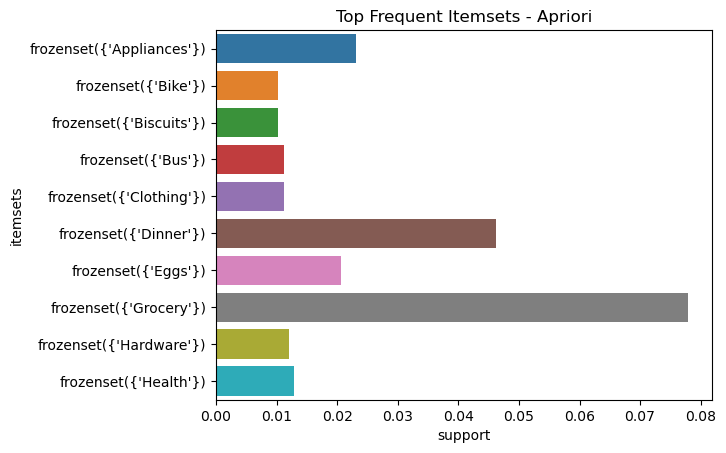

In [34]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Prepare transaction list
transactions = df.groupby('Date')['Subcategory'].apply(list).tolist()

# Transform dataset
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori
frequent_itemsets_ap = apriori(df_trans, min_support=0.01, use_colnames=True)

# Display top frequent itemsets
print(frequent_itemsets_ap.sort_values(by='support', ascending=False).head(10))

# Visualization
sns.barplot(data=frequent_itemsets_ap.head(10), x='support', y='itemsets')
plt.title('Top Frequent Itemsets - Apriori')
plt.show()


Step 3: Frequent Itemset Mining Using FP-Growth 

     support       itemsets
5   0.132819         (Milk)
7   0.101971         (auto)
13  0.095973       (snacks)
0   0.077978      (Grocery)
26  0.057412       (Kirana)
10  0.055698        (Lunch)
1   0.046272       (Dinner)
14  0.045416        (Train)
19  0.042845  (Mutual fund)
2   0.042845     (Medicine)


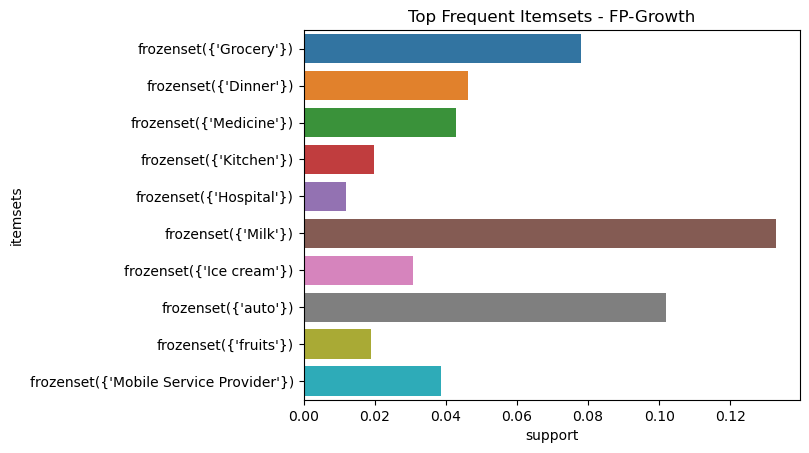

In [35]:
from mlxtend.frequent_patterns import fpgrowth

# Apply FP-Growth
frequent_itemsets_fp = fpgrowth(df_trans, min_support=0.01, use_colnames=True)

# Display top frequent itemsets
print(frequent_itemsets_fp.sort_values(by='support', ascending=False).head(10))

# Visualization
sns.barplot(data=frequent_itemsets_fp.head(10), x='support', y='itemsets')
plt.title('Top Frequent Itemsets - FP-Growth')
plt.show()


Step 4: Generating and Analyzing Association Rules 

Number of rules generated: 1
  antecedents consequents   support  confidence      lift
0     (Train)      (auto)  0.011997    0.264151  2.590455


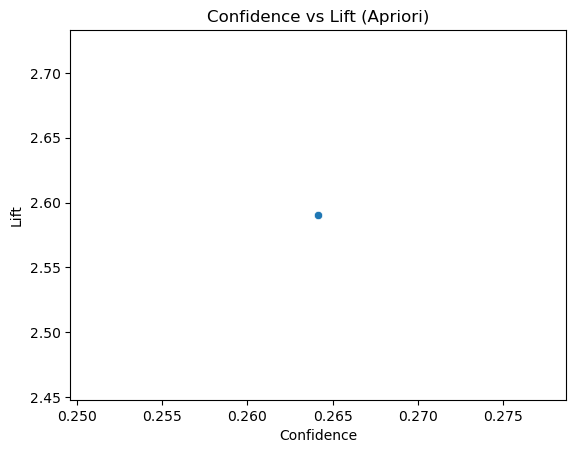

In [36]:
from mlxtend.frequent_patterns import association_rules

# Generate rules with lower confidence threshold
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.2)

# Check number of rules
print(f"Number of rules generated: {len(rules_ap)}")

# Show top rules
print(rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head())

# Visualize confidence vs lift
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=rules_ap, x='confidence', y='lift')
plt.title('Confidence vs Lift (Apriori)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()


Step 5: Comparative Analysis 

Apriori Execution Time: 0.0130 seconds
FP-Growth Execution Time: 0.0290 seconds


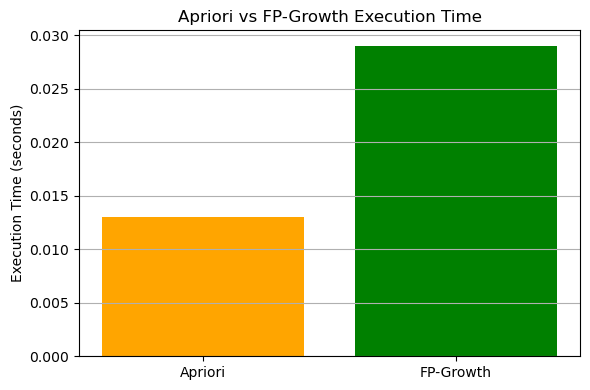

In [37]:
import time
from mlxtend.frequent_patterns import apriori, fpgrowth
import matplotlib.pyplot as plt

# Measure Apriori execution time
start_ap = time.time()
frequent_itemsets_ap = apriori(df_trans, min_support=0.01, use_colnames=True)
end_ap = time.time()
ap_time = end_ap - start_ap

# Measure FP-Growth execution time
start_fp = time.time()
frequent_itemsets_fp = fpgrowth(df_trans, min_support=0.01, use_colnames=True)
end_fp = time.time()
fp_time = end_fp - start_fp

# Print execution times
print(f"Apriori Execution Time: {ap_time:.4f} seconds")
print(f"FP-Growth Execution Time: {fp_time:.4f} seconds")

# Plot execution times
plt.figure(figsize=(6, 4))
plt.bar(['Apriori', 'FP-Growth'], [ap_time, fp_time], color=['orange', 'green'])
plt.ylabel('Execution Time (seconds)')
plt.title('Apriori vs FP-Growth Execution Time')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


I learnt that in my chosen dataset which is basically smaller in size, Apriori Apriori algorithm was faster than the FP-Growth algorithm.This outcome might seem counterintuitive because FP-Growth is generally considered more efficient for large datasets due to its compressed data structure (FP-tree) and fewer candidate generations. My argument is that the dataset is small  which can make the overhead of building and traversing the FP-tree outweigh the simpler candidate generation of Apriori, resulting in Apriori performing faster.

The challenge i had was finding the correct dataset that would really helpdetermine the best algorithim for data handling considering retails might be huge or a small business.